# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports-and-Set-Up" data-toc-modified-id="Imports-and-Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Set Up</a></div><div class="lev1 toc-item"><a href="#Coin-Toss" data-toc-modified-id="Coin-Toss-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coin Toss</a></div><div class="lev2 toc-item"><a href="#Animation" data-toc-modified-id="Animation-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Animation</a></div><div class="lev1 toc-item"><a href="#Bugs" data-toc-modified-id="Bugs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bugs</a></div><div class="lev1 toc-item"><a href="#Poisson" data-toc-modified-id="Poisson-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Poisson</a></div><div class="lev1 toc-item"><a href="#Exponential" data-toc-modified-id="Exponential-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exponential</a></div><div class="lev1 toc-item"><a href="#Text-Messages-Book-Example" data-toc-modified-id="Text-Messages-Book-Example-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Text Messages Book Example</a></div><div class="lev1 toc-item"><a href="#Chapter-1-Homework" data-toc-modified-id="Chapter-1-Homework-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Chapter 1 Homework</a></div><div class="lev2 toc-item"><a href="#Exercise-1" data-toc-modified-id="Exercise-1-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Exercise 1</a></div><div class="lev2 toc-item"><a href="#Exercise-2" data-toc-modified-id="Exercise-2-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Exercise 2</a></div><div class="lev2 toc-item"><a href="#Exercise-3" data-toc-modified-id="Exercise-3-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Exercise 3</a></div><div class="lev1 toc-item"><a href="#Text-Messages-Artificial-Example" data-toc-modified-id="Text-Messages-Artificial-Example-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Text Messages Artificial Example</a></div><div class="lev1 toc-item"><a href="#Chapter-1-Homework" data-toc-modified-id="Chapter-1-Homework-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Chapter 1 Homework</a></div><div class="lev2 toc-item"><a href="#Exercise-1" data-toc-modified-id="Exercise-1-91"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Exercise 1</a></div><div class="lev2 toc-item"><a href="#Exercise-2" data-toc-modified-id="Exercise-2-92"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Exercise 2</a></div><div class="lev2 toc-item"><a href="#Exercise-3" data-toc-modified-id="Exercise-3-93"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Exercise 3</a></div>

# Imports and Set Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import scipy.stats as stats
import pymc3 as pm
import theano.tensor as tt
import seaborn as sns
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout
from IPython.display import HTML, Latex, display
from IPython.core.pylabtools import figsize

%matplotlib inline

# import json
# s = json.load(open("styles/bmh_matplotlibrc.json"))
# matplotlib.rcParams.update(s)

plt.style.use('bmh')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elcg\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Coin Toss

In [2]:
dist = stats.beta

def coin_toss_conj(N):
    figsize(11, 4)
    x = np.linspace(0, 1, N)
    data = stats.bernoulli.rvs(0.5, size=N)
    plt.xlabel("$p$, probability of heads")
    heads = data[:N].sum()
    tails = N - heads
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, alpha=0.4)
    y = dist.pdf(x, 1 + tails, 1 + N - tails)
    plt.plot(x, y, label="observe %d tosses,\n %d tails" % (N, tails))
    plt.fill_between(x, 0, y, alpha=0.4)
    plt.vlines(0.5, 0, y.max()*1.2,  linestyles="--")

    leg = plt.legend()

    plt.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)

    plt.tight_layout()
    plt.show()

In [3]:
interact(coin_toss_conj, N=IntSlider(min=1,max=500,step=1,value=100, layout=Layout(width='99%')))

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.coin_toss_conj>

## Animation

In [4]:
dist = stats.beta

def coin_toss_animate(i, ax, inter, x):
    ax.cla()
    
    N = i * inter
    
    data = stats.bernoulli.rvs(0.5, size=N)
    ax.set_xlabel("$p$, probability of heads")
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    ax.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    ax.fill_between(x, 0, y, alpha=0.4)
    ax.vlines(0.5, 0, y.max()*1.2,  linestyles="--")

    leg = ax.legend()
    leg.get_frame().set_alpha(0.4)
    ax.autoscale(tight=True)
    ax.grid()

    ax.set_title("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)

    return []

In [5]:
def plot_coin_toss_animation():
    fig, ax = plt.subplots(figsize=(12.5, 4))
    frames = 500

    x = np.linspace(0, 1, 100)

    anim = animation.FuncAnimation(fig, coin_toss_animate, frames=frames, interval=200, blit=True, fargs=(ax, 1, x))

    plt.close() # Avoid extra picture

    return HTML(anim.to_html5_video())

In [6]:
plot_coin_toss_animation()

# Bugs

In [7]:
def fun(p, v):
    return p/(p+v*(1-p))


def plot_bugs(prov=0.5, point=0.2):
    p = np.linspace(0, 1, 100)
    y = fun(p, prov)
    figsize(17, 4)
    plt.plot(p, y, color="#348ABD", lw=3)
    plt.plot((0,1), '--k')
    xmin = p[y >= 0.5][0]
    plt.vlines(xmin,0,1, linestyles='--', lw=2)
    plt.scatter(point, fun(point,prov), s=140, c="#348ABD")
    xmax = p[np.argmax(y -p)]
    plt.vlines(xmax, xmax , fun(xmax, prov), linestyles='-', lw=2)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("Prior, $P(A) = p$")
    plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
    plt.title("Are there bugs in my code?")
    plt.show()
     
    figsize(17, 4)
    prior = [point, 1-point]
    ypoint = fun(point,prov)
    posterior = [ypoint, 1-ypoint]
    b1 = plt.bar([0, .7], prior, alpha=0.70, width=0.25,
            label="prior distribution", lw="3")

    b2 = plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
            width=0.25, label="posterior distribution", lw="3")
    
    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, "{:.2f}".format(height), ha='center', va='bottom')

    autolabel(b1)
    autolabel(b2)

    
    plt.ylim(0, 1)
    plt.xticks([0.20, .95], ["Bugs Absent", "Bugs Present"])
    plt.title("Prior and Posterior probability of bugs present")
    plt.ylabel("Probability")
    plt.legend(loc="upper left");
    plt.show()

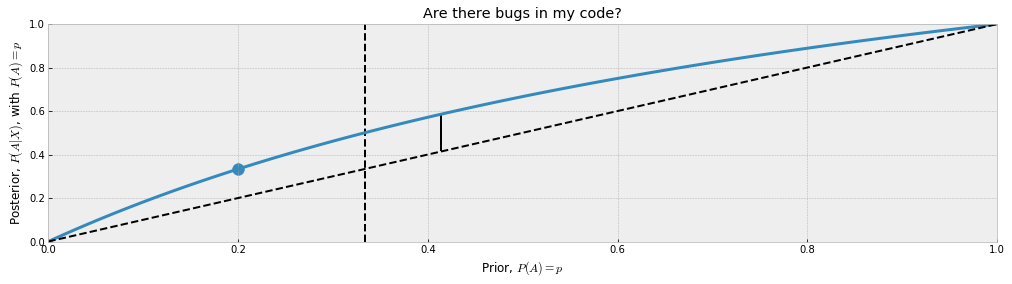

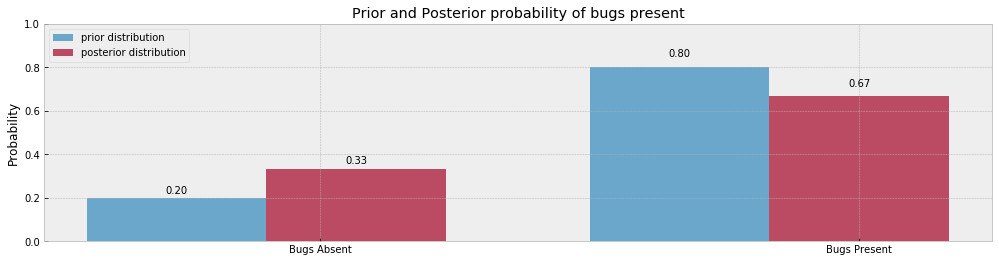

In [8]:
plot_bugs()

In [9]:
interact(plot_bugs, 
         prov=FloatSlider(min=0,max=1,step=0.01,value=0.5, layout=Layout(width='99%')),
         point=FloatSlider(min=0,max=1,step=0.01,value=0.2, layout=Layout(width='99%')))

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.plot_bugs>

In [10]:
p = np.linspace(0, 1, 100)

In [11]:
%timeit p[2*p/(1+p) >= 0.5][0]

13 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit p[p/(1+p) >= 0.25][0]

12.1 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
%timeit p[p >= (1+p)/4][0]

10.7 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
%timeit p[p >= 0.25 + p/4][0]

8.78 µs ± 243 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
%timeit p[3/4 * p >= 0.25][0]

7.55 µs ± 947 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%timeit p[np.where(p>1/3)[0][0]]

5.76 µs ± 911 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
%timeit p[p >= 1/3][0]

4.9 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
%timeit p[np.argmax(p>1/3)]

8.38 µs ± 615 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
%timeit p[np.argmax(2*p/(1+p) -p)]

20 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
%timeit p[np.argmax(p*(1-p)/(1+p))]

20.6 µs ± 3.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
p[np.argmax(p*(2/(p+1)-1))]

0.4141414141414142

In [22]:
np.amax(2*p/(1+p) -p)

0.17157287157287154

# Poisson

In [23]:
def memoize(f):
    memo = {}
    def helper(x):
        if x not in memo:
            memo[x] = f(x)
        return memo[x]
    return helper

In [24]:
@memoize
def fact(a):
    if a <= 1:
        return 1
    else:
        return fact(a-1) + fact(a-2)

In [25]:
def poisson(lamb, element):
    return (lamb**element * np.e**(-lamb))/(fact(element))

In [26]:
def poisson2(array, lamb):
    return (lamb**array * np.e**(-lamb))/np.array(list(map(fact, array)))

In [27]:
t = np.arange(10)

In [28]:
poisson_np = np.vectorize(poisson)

In [29]:
%timeit list(map(lambda x: poisson(1.5, x), t))

146 µs ± 3.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [30]:
%timeit poisson_np(1.5, t)

101 µs ± 5.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [31]:
%timeit poisson2(t, 1.5)

32 µs ± 4.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
poi = stats.poisson

In [33]:
%timeit poi.pmf(t, 1.5)

277 µs ± 19 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
def plot_poisson(lambda2_=4.2):
    figsize(17, 5)

    a = np.arange(16)
    poi = stats.poisson

    plt.bar(a, poi.pmf(a, 1.5), label="$\lambda = 1.50$", alpha=0.60, lw="3")

    plt.bar(a, poi.pmf(a, lambda2_), label="$\lambda = %.2f$" % lambda2_, alpha=0.60, lw="3")

    plt.xticks(a + 0.4, a)
    plt.legend()
    plt.ylabel("probability of $k$")
    plt.xlabel("$k$")
    plt.title("Probability mass function of a Poisson random variable; differing $\lambda$ values");

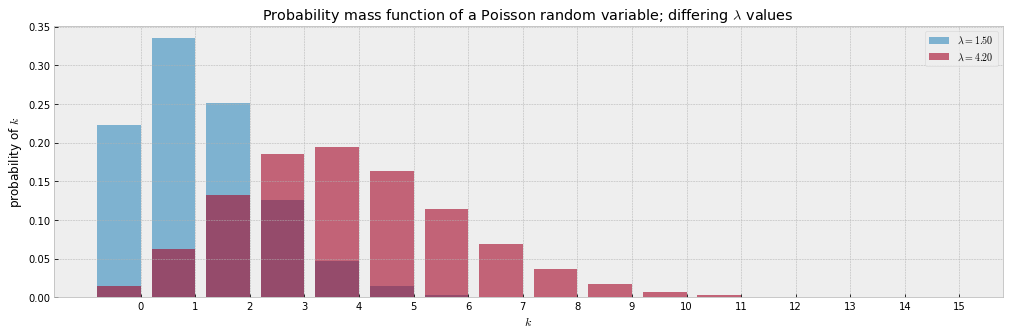

In [35]:
plot_poisson()

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.plot_poisson>

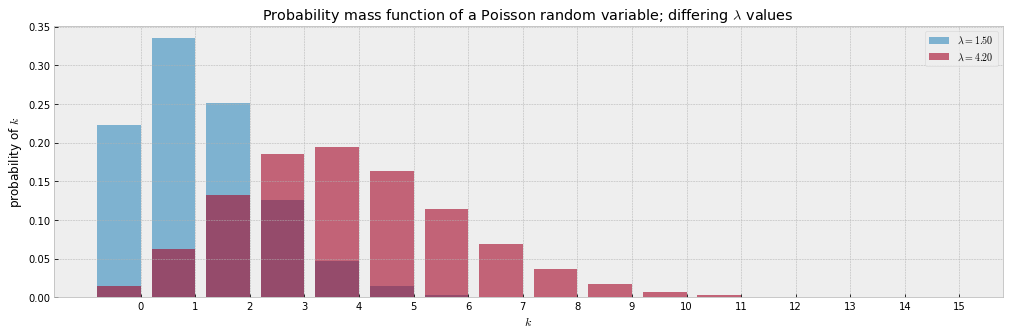

In [36]:
interact(plot_poisson, lambda2_=FloatSlider(min=0, max=15, step=0.05,value=4.2, layout=Layout(width='99%')))

In [37]:
def animate(i, ax, inter, a, base):
    ax.cla()
    
    lambda2_ = i * inter

    ax.bar(a, base, label="$\lambda = 1.500$", alpha=0.60, lw="3")

    ax.bar(a, poi.pmf(a, lambda2_), label="$\lambda = %.2f$" % lambda2_, alpha=0.60, lw="3")
    ax.set_ylim(0, 1)
    ax.set_xticks(a)
    ax.legend()
    ax.set_ylabel("probability of $k$")
    ax.set_xlabel("$k$")
    ax.set_title("Probability mass function of a Poisson random variable; differing $\lambda$ values")
    return []

In [38]:
def poisson_animation():
    fig, ax = plt.subplots(figsize=(12.5, 5))
    frames = 350

    a = np.arange(16)
    poi = stats.poisson
    base = poi.pmf(a, 1.5)

    anim = animation.FuncAnimation(fig, animate, frames=frames, interval=75, blit=True, fargs=(ax, 0.05, a, base))

    plt.close() # Avoid extra picture

    return HTML(anim.to_html5_video())

In [39]:
poisson_animation()

# Exponential

In [40]:
def plot_exponential(l=2.5):
    figsize(17, 7)
    a = np.linspace(0, 4, 100)
    expo = stats.expon

    plt.plot(a, expo.pdf(a, scale=1./1), lw=3, label="$\lambda = 1.00$")
    plt.fill_between(a, expo.pdf(a, scale=1./1), alpha=.33)

    plt.plot(a, expo.pdf(a, scale=1./l), lw=3, label="$\lambda = %.2f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), alpha=.33)

    plt.legend()
    plt.ylabel("PDF at $z$")
    plt.xlabel("$z$")
    plt.ylim(0,3)
    plt.xlim(0,3)
    plt.title("Probability density function of an Exponential random variable;\
     differing $\lambda$");
    plt.show()

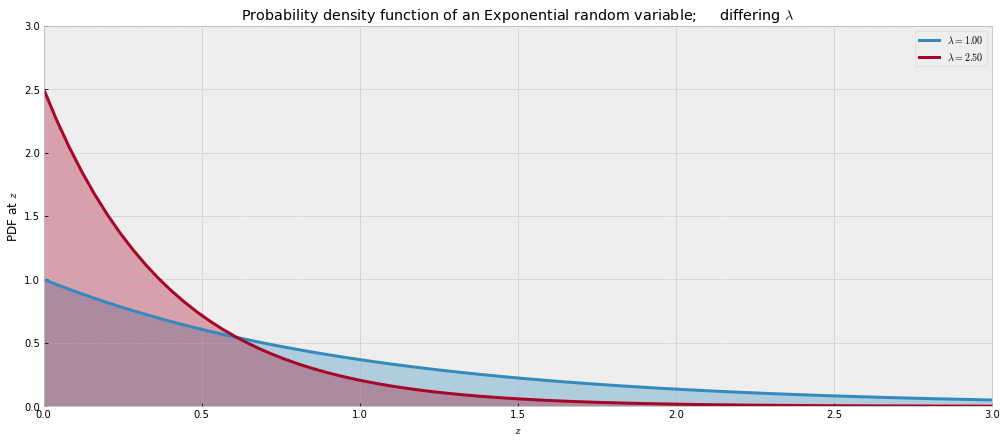

In [41]:
plot_exponential()

In [42]:
interact(plot_exponential, l=FloatSlider(min=0.05, max=3, step=0.05, value=2, layout=Layout(width='99%')))

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.plot_exponential>

In [43]:
def exponential_animate(i, ax, inter, a, base):
    expo = stats.expon
    ax.cla()
    
    l = i * inter + 0.05
    
    ax.plot(a, base, lw=3, label="$\lambda = 1$")
    ax.fill_between(a, base, alpha=.33)

    ax.plot(a, expo.pdf(a, scale=1./l), lw=3, label="$\lambda = %.2f$" % l)
    ax.fill_between(a, expo.pdf(a, scale=1./l), alpha=.33)

    ax.legend()
    ax.set_ylabel("PDF at $z$")
    ax.set_xlabel("$z$")
    ax.set_ylim(0, 4)
    ax.set_xlim(0, 4)
    ax.set_title("Probability density function of an Exponential random variable; differing $\lambda$");
    
    return []

In [44]:
1/(1/3)

3.0

In [45]:
def exponential_animation():
    fig, ax = plt.subplots(figsize=(12.5, 4))

    frames = 160

    a = np.linspace(0, 4, 100)
    expo = stats.expon

    base = expo.pdf(a, scale=1)

    anim = animation.FuncAnimation(fig, exponential_animate, frames=frames, interval=75, blit=True, fargs=(ax, 0.025, a, base))

    plt.close() # Avoid extra picture

    return HTML(anim.to_html5_video())

In [46]:
exponential_animation()

# Text Messages Book Example

In [47]:
sample = np.loadtxt("Chapter1_Introduction/data/txtdata.csv")
n_sample = len(sample)
ix_sample = np.arange(n_sample)

In [48]:
def plot_text_bar(sample):
    figsize(17, 5)
    plt.bar(ix_sample, sample)
    plt.xlabel("Time (days)")
    plt.ylabel("count of text-msgs received")
    plt.title("Did the user's texting habits change over time?")
    plt.xlim(0, n_sample);

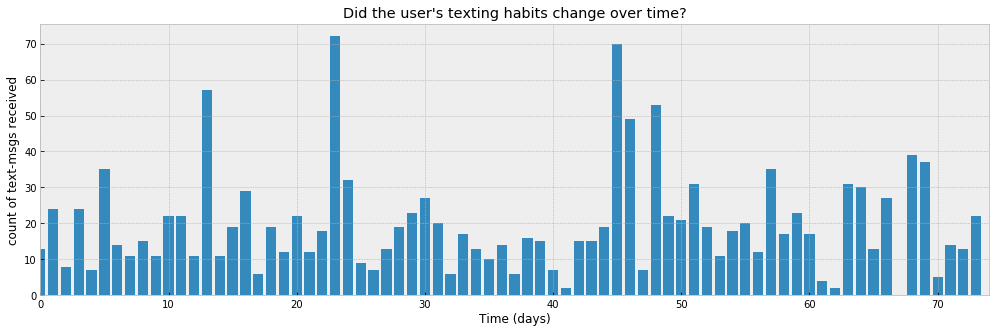

In [49]:
plot_text_bar(sample)

In [50]:
with pm.Model() as model:
    # Step 1
    alpha = 1.0/sample.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_sample - 1)
    
    # Step 2
    lambda_ = pm.math.switch(tau > ix_sample, lambda_1, lambda_2)
    
    # Step 3
    observation = pm.Poisson("obs", lambda_, observed=sample)
    
    # Step 4
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [18:10<00:00, 13.75it/s]


In [51]:
figsize(12.5, 10)

lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

In [52]:
def plot_lambda_lambda_tau(lambda_1_samples, lambda_2_samples, tau_samples):
    figsize(17, 10)
    ax = plt.subplot(311)
    ax.set_autoscaley_on(False)

    plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
             label="posterior of $\lambda_1$", color="#A60628", normed=True)
    plt.legend(loc="upper left")
    plt.title(r"""Posterior distributions of the variables
        $\lambda_1,\;\lambda_2,\;\tau$""")
    plt.xlim([0, n_sample])
    plt.xlabel("$\lambda_1$ value")

    ax = plt.subplot(312)
    ax.set_autoscaley_on(False)
    plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
             label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
    plt.legend(loc="upper left")
    plt.xlim([0, n_sample])
    plt.xlabel("$\lambda_2$ value")

    plt.subplot(313)
    w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
    plt.hist(tau_samples, bins=n_sample, alpha=1,
             label=r"posterior of $\tau$",
             color="#467821", weights=w, rwidth=2.)
    plt.xticks(ix_sample)

    plt.legend(loc="upper left")
    plt.ylim([0, .75])
    plt.xlim([0, n_sample])
    plt.xlabel(r"$\tau$ (in days)")
    plt.ylabel("probability");

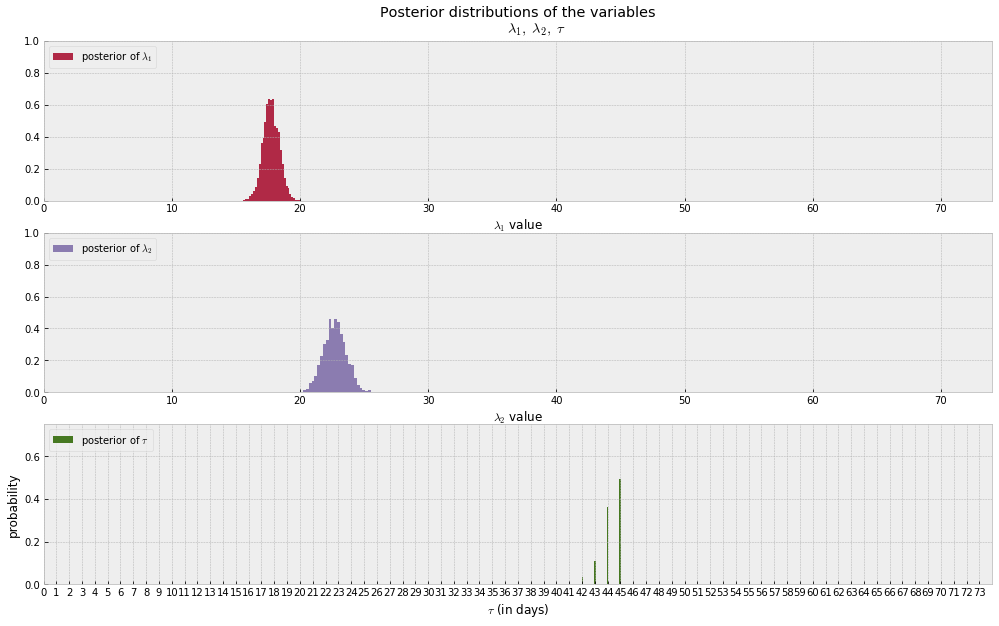

In [53]:
plot_lambda_lambda_tau(lambda_1_samples, lambda_2_samples, tau_samples)

In [54]:
def text_lambda_prediction(lambda_1_samples, lambda_2_samples, tau_samples):
    figsize(17, 5)
    N = tau_samples.shape[0]
    expected_texts_per_day = np.zeros(n_sample)
    for day in range(0, n_sample):
        ix = day < tau_samples
        expected_texts_per_day[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N

    plt.plot(range(n_sample), expected_texts_per_day, lw=4, color="#E24A33",
             label="expected number of text-messages received")
    plt.xlim(0, n_sample)
    plt.xlabel("Day")
    plt.ylabel("Expected # text-messages")
    plt.title("Expected number of text-messages received")
    plt.ylim(0, 60)
    plt.bar(ix_sample, sample, alpha=0.65, label="observed texts per day")

    plt.legend(loc="upper left");

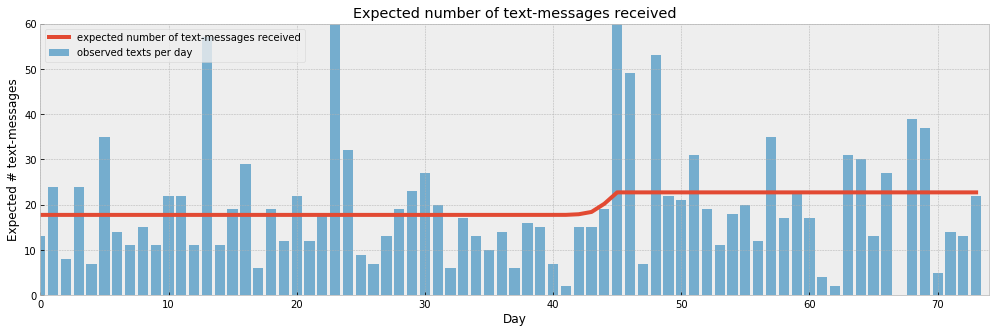

In [55]:
text_lambda_prediction(lambda_1_samples, lambda_2_samples, tau_samples)

# Chapter 1 Homework

## Exercise 1

In [56]:
print("Predicted Lambda_1: {}".format(lambda_1_samples.mean()))
print("Predicted Lambda_2: {}".format(lambda_2_samples.mean()))

Predicted Lambda_1: 17.749894934959332
Predicted Lambda_2: 22.72124195321372


## Exercise 2

In [57]:
print("Wrong Answer: {}".format(lambda_1_samples.mean()/lambda_2_samples.mean()))
print("Maybe Right Answer: {}".format((lambda_1_samples/lambda_2_samples).mean()))

Wrong Answer: 0.7812026724379283
Maybe Right Answer: 0.7824352916037366


## Exercise 3

In [58]:
with pm.Model() as model:
    # Step 1
    alpha = 1.0/sample.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=44)
    
    # Step 2
    lambda_ = pm.math.switch(tau > ix_sample, lambda_1, lambda_2)
    
    # Step 3
    observation = pm.Poisson("obs", lambda_, observed=sample)
    
    # Step 4
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [16:35<00:00, 15.06it/s]


In [59]:
figsize(12.5, 10)

lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

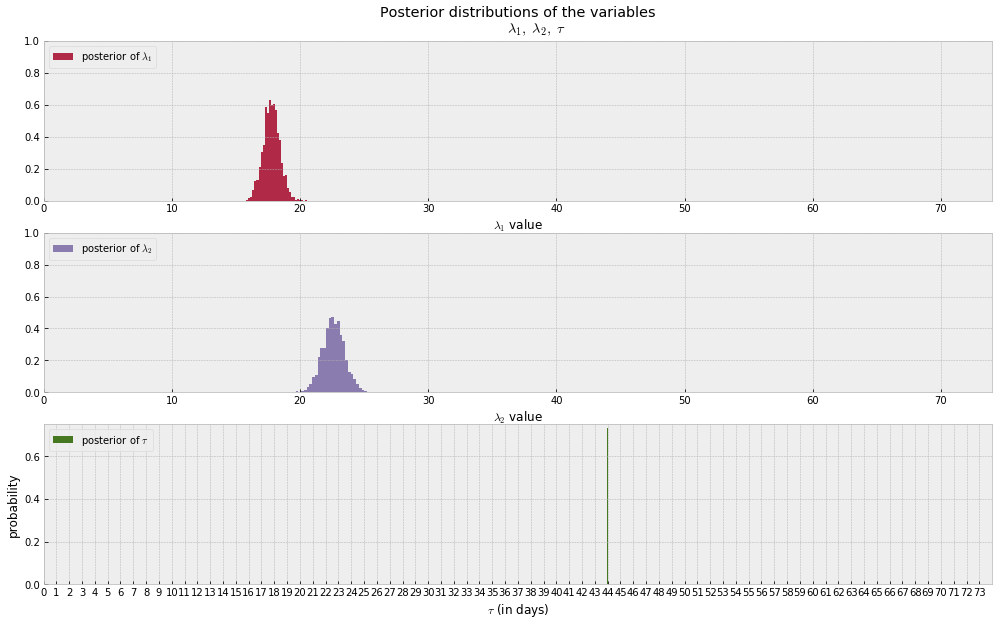

In [60]:
plot_lambda_lambda_tau(lambda_1_samples, lambda_2_samples, tau_samples)

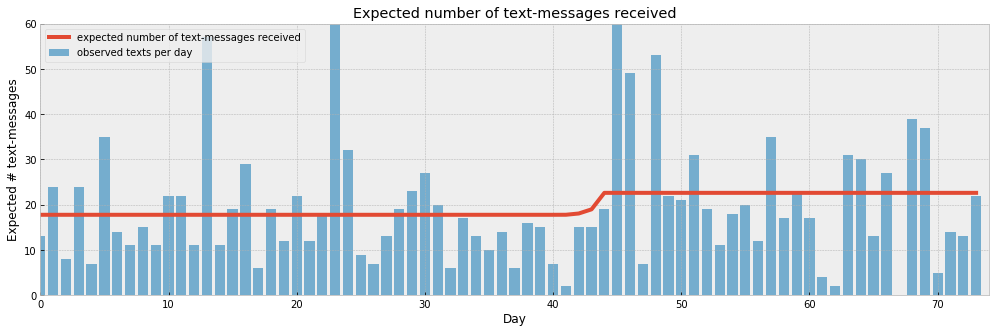

In [61]:
text_lambda_prediction(lambda_1_samples, lambda_2_samples, tau_samples)

In [62]:
print("Predicted Lambda_1: {}".format(lambda_1_samples.mean()))
print("Predicted Lambda_2: {}".format(lambda_2_samples.mean()))

Predicted Lambda_1: 17.772705332946455
Predicted Lambda_2: 22.6164801506171


In [63]:
print("Wrong Answer: {}".format(lambda_1_samples.mean()/lambda_2_samples.mean()))
print("Maybe Right Answer: {}".format((lambda_1_samples/lambda_2_samples).mean()))

Wrong Answer: 0.7858298556887297
Maybe Right Answer: 0.7870249289057089


# Text Messages Artificial Example

In [64]:
poi = stats.poisson
days = 80
first = 45
last = days - first
λ1 = 10
λ2 = 17
first_part = poi.rvs(λ1, size=first)
second_part = poi.rvs(λ2, size=last)

sample = np.concatenate((first_part, second_part))
n_sample = len(sample)
ix_sample = np.arange(n_sample)

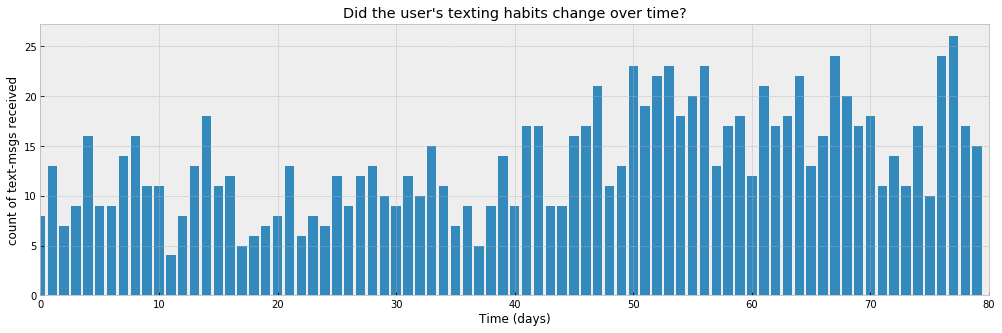

In [65]:
plot_text_bar(sample)

In [66]:
with pm.Model() as model:
    # Step 1
    alpha = 1.0/sample.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_sample - 1)
    
    # Step 2
    lambda_ = pm.math.switch(tau > ix_sample, lambda_1, lambda_2)
    
    # Step 3
    observation = pm.Poisson("obs", lambda_, observed=sample)
    
    # Step 4
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [17:01<00:00, 14.68it/s]


In [67]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

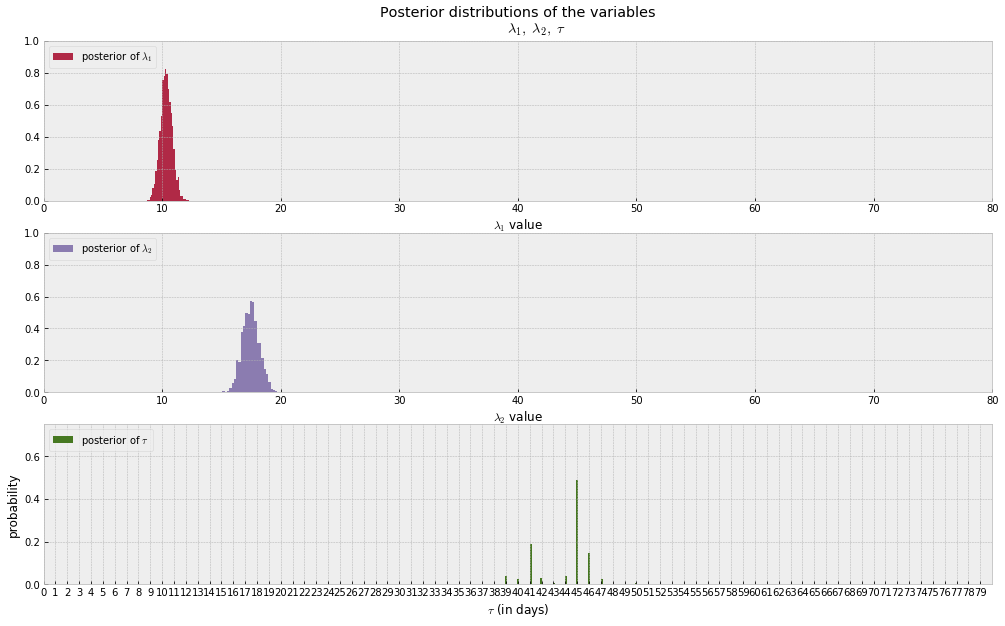

In [68]:
plot_lambda_lambda_tau(lambda_1_samples, lambda_2_samples, tau_samples)

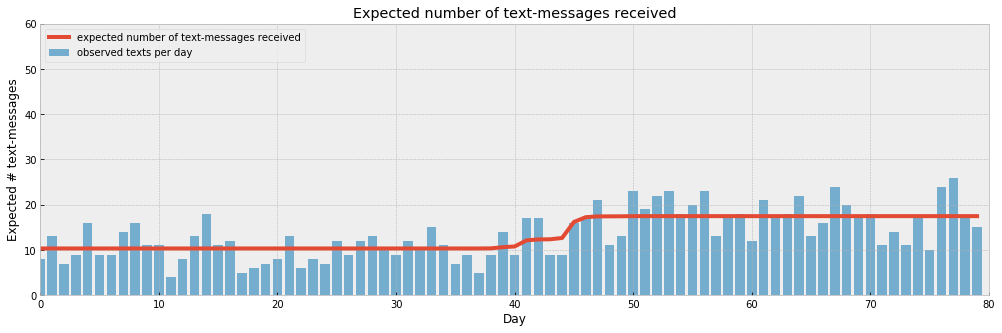

In [69]:
text_lambda_prediction(lambda_1_samples, lambda_2_samples, tau_samples)

# Chapter 1 Homework

## Exercise 1

In [70]:
display(Latex("$ \lambda_1 $"))
λ1_mean = lambda_1_samples.mean()
print("Predicted Lambda: {}".format(λ1_mean))
print("Actual Lambda: {}".format(λ1))
print("Absolute Error: {}".format(λ1 - λ1_mean))
print("Relative Error: {}".format((λ1 - λ1_mean) / λ1))

<IPython.core.display.Latex object>

Predicted Lambda: 10.342079306116585
Actual Lambda: 10
Absolute Error: -0.34207930611658455
Relative Error: -0.03420793061165846


In [71]:
display(Latex("$ \lambda_2 $"))
λ2_mean = lambda_2_samples.mean()
print("Predicted Lambda: {}".format(λ2_mean))
print("Actual Lambda: {}".format(λ2))
print("Absolute Error: {}".format(λ2 - λ2_mean))
print("Relative Error: {}".format((λ2 - λ2_mean) / λ2))

<IPython.core.display.Latex object>

Predicted Lambda: 17.474142348863886
Actual Lambda: 17
Absolute Error: -0.47414234886388584
Relative Error: -0.02789072640375799


## Exercise 2

In [72]:
print("Wrong Answer: {}".format(lambda_1_samples.mean()/lambda_2_samples.mean()))
print("Maybe Right Answer: {}".format((lambda_1_samples/lambda_2_samples).mean()))

Wrong Answer: 0.5918504668006779
Maybe Right Answer: 0.5927638751553352


## Exercise 3

In [73]:
with pm.Model() as model:
    # Step 1
    alpha = 1.0/sample.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=44)
    
    # Step 2
    lambda_ = pm.math.switch(tau > ix_sample, lambda_1, lambda_2)
    
    # Step 3
    observation = pm.Poisson("obs", lambda_, observed=sample)
    
    # Step 4
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [27:21<00:00,  9.14it/s]


In [74]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

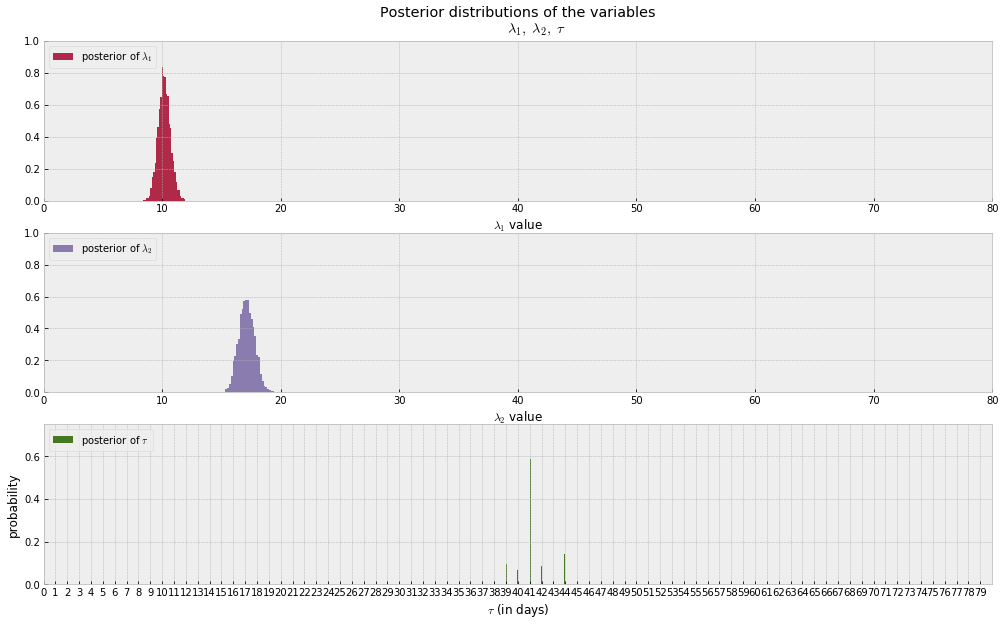

In [75]:
plot_lambda_lambda_tau(lambda_1_samples, lambda_2_samples, tau_samples)

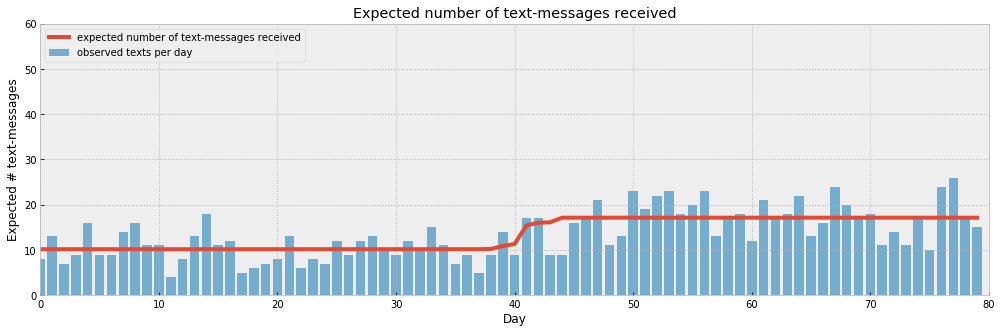

In [76]:
text_lambda_prediction(lambda_1_samples, lambda_2_samples, tau_samples)

In [77]:
display(Latex("$ \lambda_1 $"))
λ1_mean = lambda_1_samples.mean()
print("Predicted Lambda: {}".format(λ1_mean))
print("Actual Lambda: {}".format(λ1))
print("Absolute Error: {}".format(λ1 - λ1_mean))
print("Relative Error: {:1.3f}%".format((λ1 - λ1_mean) / λ1 * 100))

display(Latex("$ \lambda_2 $"))
λ2_mean = lambda_2_samples.mean()
print("Predicted Lambda: {}".format(λ2_mean))
print("Actual Lambda: {}".format(λ2))
print("Absolute Error: {}".format(λ2 - λ2_mean))
print("Relative Error: {:1.3f}%".format((λ2 - λ2_mean) / λ2*100))

<IPython.core.display.Latex object>

Predicted Lambda: 10.176624966662985
Actual Lambda: 10
Absolute Error: -0.17662496666298466
Relative Error: -1.766%


<IPython.core.display.Latex object>

Predicted Lambda: 17.13288308548359
Actual Lambda: 17
Absolute Error: -0.1328830854835914
Relative Error: -0.782%


In [78]:
print("Wrong Answer: {}".format(lambda_1_samples.mean()/lambda_2_samples.mean()))
print("Maybe Right Answer: {}".format((lambda_1_samples/lambda_2_samples).mean()))

Wrong Answer: 0.5939820470312711
Maybe Right Answer: 0.5948740561916448
